Predict Fashion Images

İnstall packet

In [7]:
!git clone https://github.com/facebookresearch/detectron2.git

Cloning into 'detectron2'...


In [4]:
pip install -e detectron2

Obtaining file:///D:/Downloads/Fashion_Analysis3/Fashion_Analysis/detectron2
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "D:\Downloads\Fashion_Analysis3\Fashion_Analysis\detectron2\setup.py", line 10, in <module>
          import torch
      ModuleNotFoundError: No module named 'torch'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
import sys, os
sys.path.append('D:/Downloads/Fashion_Analysis/Fashion_Analysis/detectron2')
sys.path.append('D:/Downloads/Fashion_Analysis/Fashion_Analysis/detectron2/detectron2')

In [2]:
sys.path

['d:\\Downloads\\Fashion_Analysis3\\Fashion_Analysis',
 'c:\\Users\\bilal\\anaconda3\\envs\\py39\\python39.zip',
 'c:\\Users\\bilal\\anaconda3\\envs\\py39\\DLLs',
 'c:\\Users\\bilal\\anaconda3\\envs\\py39\\lib',
 'c:\\Users\\bilal\\anaconda3\\envs\\py39',
 '',
 'C:\\Users\\bilal\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'c:\\Users\\bilal\\anaconda3\\envs\\py39\\lib\\site-packages',
 'c:\\Users\\bilal\\anaconda3\\envs\\py39\\lib\\site-packages\\win32',
 'c:\\Users\\bilal\\anaconda3\\envs\\py39\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\bilal\\anaconda3\\envs\\py39\\lib\\site-packages\\Pythonwin',
 'D:/Downloads/Fashion_Analysis/Fashion_Analysis/detectron2',
 'D:/Downloads/Fashion_Analysis/Fashion_Analysis/detectron2/detectron2']

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import albumentations as A
import cv2
import itertools
import os
from matplotlib.gridspec import GridSpec
import matplotlib.pylab as plt
import numpy as np

from colorthief import ColorThief
from sty import fg, bg, ef, rs

from copyreg import pickle
from detectron2.engine import DefaultPredictor
import pickle
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from utils import *
from PIL import Image

import tensorflow as tf
#import tensorflow_hub as hub

print("TF version:", tf.__version__)
#print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

c:\Users\bilal\anaconda3\envs\detectron_env3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TF version: 2.8.3
GPU is available


In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
cfg_save_path = "SE_CFG_3.pickle"

with open(cfg_save_path,'rb') as f:
    cfg = pickle.load(f)

cfg.MODEL.WEIGHTS = os.path.join("model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8

In [5]:
#Tahmin edilecek sınıfların listesi
MetadataCatalog.get("train").set(thing_classes=['upperbody', 'lowerbody', 'wholebody','footwear', 'accessories'])
predictor = DefaultPredictor(cfg)

In [6]:
class_names = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes

In [7]:
def predict_detectron(image_path, predictor, cfg,save_dir=None, show=False):
    instance_number = 0
    ext = 0.0
    while tqdm(instance_number == 0):
        print(instance_number)
        cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.80 - ext
        #MetadataCatalog.get("train").set(thing_classes=['upperbody', 'lowerbody', 'footwear', 'accessories'])
        predictor = DefaultPredictor(cfg)
        im = cv2.imread(image_path)
        outputs = predictor(im)
        instance_number = len(outputs["instances"])
        ext = ext + 0.05
    v = Visualizer(im[:,:,::-1], metadata=MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.5, instance_mode=ColorMode.SEGMENTATION)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    if show:
        plt.figure(figsize=(14,10))
        plt.imshow(v.get_image())
        plt.show()
    if save_dir != None:
        filename = save_dir+"/"+image_path.split("/")[-1].split(".")[0]+'.jpg'
        cv2.imwrite(filename, cv2.cvtColor(v.get_image(), cv2.COLOR_RGB2BGR))
    return outputs

0it [00:00, ?it/s]


0


c:\Users\bilal\anaconda3\envs\detectron_env3\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
0it [00:00, ?it/s]


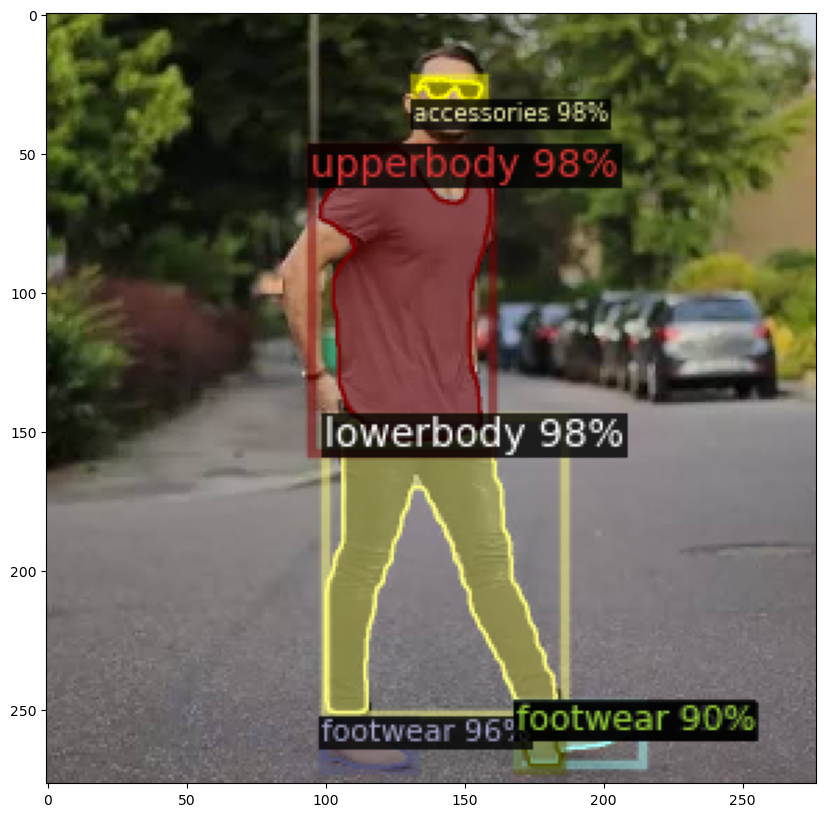

In [8]:
image_path = "example.jpeg"
im_outputs = predict_detectron(image_path, predictor, cfg,save_dir=None, show=True)

In [9]:
def crop_object(image, box):
  """Crops an object in an image

  Inputs:
    image: PIL image
    box: one box from Detectron2 pred_boxes
  """

  x_top_left = box[0]
  y_top_left = box[1]
  x_bottom_right = box[2]
  y_bottom_right = box[3]
  x_center = (x_top_left + x_bottom_right) / 2
  y_center = (y_top_left + y_bottom_right) / 2

  crop_img = image.crop((int(x_top_left), int(y_top_left), int(x_bottom_right), int(y_bottom_right)))
  return crop_img

C:\Users\bilal\AppData\Local\Temp\ipykernel_25524\115301620.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  maks_2 = np.stack((mask,mask,mask),axis=2).astype(np.bool)


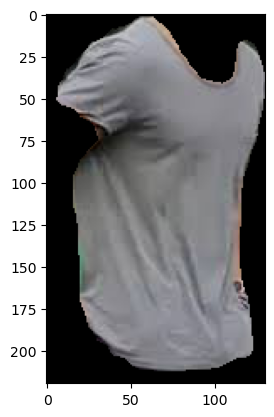

In [10]:
box = im_outputs["instances"][0].pred_boxes.tensor.tolist()[0]
image = Image.open(image_path)
mask = im_outputs["instances"][0].pred_masks[0].cpu().numpy()
maks_2 = np.stack((mask,mask,mask),axis=2).astype(np.bool)
masked_img = image * maks_2
cv2.imwrite('sample_out_2.png', cv2.cvtColor(masked_img, cv2.COLOR_RGB2BGR)) 
image = Image.open("sample_out_2.png")
crop_img = crop_object(image, box)
plt.imshow(crop_img)

Colorthief 250 pikselden yukarısını bakmadığı için arkaplanı beyaz yapılır.(Bunun yerine direk kesilebilr)

In [11]:
crop = np.array(crop_img)
crop.setflags(write=1)
masked_num = 1
crop[crop<masked_num] = 255

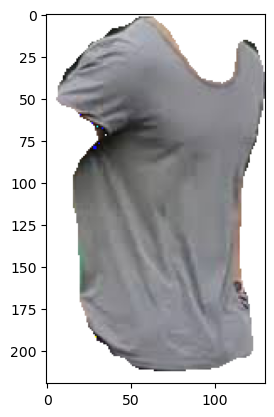

In [12]:
plt.imshow(crop)

Modellerin yolları.

In [13]:
def get_model(model_name):
    if model_name == "upperbody":
        return tf.keras.models.load_model('upperbody/upperbody_acc_train_092_val_073_incV3_299_299.h5')
    if model_name == "lowerbody":
        return tf.keras.models.load_model('lowerbody/lowerbody_acc_train_093_val_088_incV3_299_299.h5')
    if model_name == "pants":
        return tf.keras.models.load_model('lowerbody/pants/pants_type_acc_train_09_val_08_incV3_299_299.h5')
    if model_name == "accessories":
        return tf.keras.models.load_model('accessories/accessories_acc_train_097_val_093_incV3_299_299.h5')
    if model_name == "shirt_blouse":
        return tf.keras.models.load_model('upperbody/gomlek_kol/gomlek_kol_uzunluk_acc_train_099_val_089_incV3_299_299_weights.h5')
    if model_name == "sweater":
        return tf.keras.models.load_model('upperbody/kazak_yaka/kazak_yaka_tip_acc_train_098_val_070_incV3_299_299.h5')
    if model_name == "skirt_length":
        return tf.keras.models.load_model('lowerbody/skirt_length/skirt_length_incV3_299_299.h5')   
    if model_name == "skirt_opening":
        return tf.keras.models.load_model('lowerbody/skirt_opening/skirt_opening_acc_train_099_val_093_incV3_299_299.h5')   

Sınıflara ait modellerin sınıflarının listeleri.

In [14]:
def get_model_classes(class_name):
    if class_name == "upperbody":
        return ['cardigan','jacket','shirt_blouse','sweater','top_t_shirt_sweatshirt','vest']
    if class_name == "lowerbody":
        return ['pants', 'shorts', 'skirt']
    if class_name == "pants":
        return ['capri', 'sailor', 'sweat']
    if class_name == "accessories":
        return ['bag, wallet', 'glasses', 'hat', 'tie', 'umbrella', 'watch']
    if class_name == "shirt_blouse":
        return ['short (length)', 'wrist-length']
    if class_name == "sweater":
        return ['round (neck)', 'turtle (neck)', 'v-neck']
    if class_name == "skirt_length":
        return ['maxi', 'midi', 'mini'] 
    if class_name == "skirt_opening":
        return ['fly (opening)', 'no opening']

Sınıflara ait modelleri bulup tahmini döndürür.

In [15]:
def predict_class_name(image,class_name):
    prediction_scores = get_model(class_name).predict(np.expand_dims(image, axis=0))
    predicted_index = np.argmax(prediction_scores)
    cls_name = get_model_classes(class_name)[predicted_index]
    return cls_name

Resmin dominant renk RGB kodlarını geri döndürür.

In [16]:
def get_color(image):
    color_thief = ColorThief(image)
    dominant_color = color_thief.get_color(quality=1)
    palette = color_thief.get_palette(color_count=8)
    a = dominant_color[0]
    b = dominant_color[1]
    c = dominant_color[2]
    bar = bg(a,b,c) + str(a) + ","+ str(b) + "," + str(c) + bg.rs
    return [a,b,c]

Detectron2'den aldığı tahmin sayısını her tahmin için belirlediğimiz sınıf modellerine tahmin ettirip sonucu yazdırır ve sonucu string olarak döndürür.

In [17]:
def print_classes(im_outputs,image_path):
    upperbody_list = []
    lowerbody_list= []
    accessories_list = []
    wholebody_list = []
    footwear_list = []
    
    upperbody_color = []
    lowerbody_color= []
    accessories_color = []
    wholebody_color = []
    footwear_color = []

    results = []

    for instances in range(len(im_outputs["instances"])):
        box = im_outputs["instances"][instances].pred_boxes.tensor.tolist()[0]
        mask = im_outputs["instances"][instances].pred_masks[0].cpu().numpy()
        cls_name = class_names[im_outputs["instances"][instances].pred_classes.tolist()[0]]
        image = Image.open(image_path)

        maks_2 = np.stack((mask,mask,mask),axis=2).astype(np.bool)
        masked_img = image * maks_2
        cv2.imwrite('masked_img.png', cv2.cvtColor(masked_img, cv2.COLOR_RGB2BGR)) 
        image = Image.open("masked_img.png")
        crop_img = crop_object(image, box)
        crop_img = np.array(crop_img)
        masked_num = 1
        crop_img[crop_img<masked_num] = 255
        crop_img = Image.fromarray(np.uint8(crop_img)).convert('RGB')
        image = np.asarray(crop_img.resize((299, 299)))/255.0

        filename = "Crop_"+str(instances)+".jpg"
        crop_img.save(filename)
        color_image = get_color(filename)
        #color_images.append(color_image)
        os.remove(filename)
        os.remove("masked_img.png")
        if cls_name == "upperbody":
            upperbody_classes = {"Category":"",
                        "Upperbody main category":"",
                        "Shirt-blouse category":"",
                        "Sweater category":""}
            color_image_class = {"upperbody "+str(instances):color_image}
            upperbody_classes["Category"] = cls_name
            upp_cls_name = predict_class_name(image,"upperbody")
            upperbody_classes["Upperbody main category"] = upp_cls_name
            if upp_cls_name == "shirt_blouse":
                upp_cls_name = predict_class_name(image,"shirt_blouse")
                upperbody_classes["Shirt-blouse sleeve length category"] = upp_cls_name
            if upp_cls_name == "sweater":
                upp_cls_name = predict_class_name(image,"sweater")
                upperbody_classes["Sweater category"] = upp_cls_name
            upperbody_list.append(upperbody_classes)
            upperbody_color.append(color_image_class)
        if cls_name == "lowerbody":
            lowerbody_classes = {"Category":"",
                        "Lowerbody main category":"",
                        "Pants category":"",
                        "Skirt-length category":"",
                        "Skirt-opening category":""}
            color_image_class = {"lowerbody "+str(instances):color_image}
            lowerbody_classes["Category"] = cls_name
            low_cls_name = predict_class_name(image,"lowerbody")
            lowerbody_classes["Lowerbody main category"] = low_cls_name
            if low_cls_name == "pants":
                low_cls_name = predict_class_name(image,"pants")
                lowerbody_classes["Pants category"] = low_cls_name
            if low_cls_name == "skirt":
                low_cls_name = predict_class_name(image,"skirt_length")
                low_cls_name_2 = predict_class_name(image,"skirt_opening")
                lowerbody_classes["Skirt-length category"] = low_cls_name
                lowerbody_classes["Skirt-opening category"] = low_cls_name_2
            lowerbody_list.append(lowerbody_classes)
            lowerbody_color.append(color_image_class)
        if cls_name == "accessories":
            accessories_classes = {"Category":"",
                        "Accessories main category":""}
            color_image_class = {"accessories "+str(instances):color_image}
            accessories_classes["Category"] = cls_name
            acc_cls_name = predict_class_name(image,"accessories")
            accessories_classes["Accessories main category"] = acc_cls_name
            accessories_list.append(accessories_classes)
            accessories_color.append(color_image_class)
        if cls_name == "wholebody":
            wholebody_classes = {"Category":""}
            color_image_class = {"wholebody "+str(instances):color_image}
            wholebody_classes["Category"] = cls_name
            wholebody_list.append(wholebody_classes)
            wholebody_color.append(color_image_class)
        if cls_name == "footwear":
            footwear_classes = {"Category":""}
            color_image_class = {"footwear "+str(instances):color_image}
            footwear_classes["Category"] = cls_name
            footwear_list.append(footwear_classes)
            footwear_color.append(color_image_class)

    classes = [upperbody_list,lowerbody_list,accessories_list,wholebody_list,footwear_list]
    color_classes = [upperbody_color,lowerbody_color,accessories_color,wholebody_color,footwear_color]
    classes_names = ["upperbody","lowerbody","accessories","wholebody","footwear"]
    
    ind_class_name = 0
    for ind,fashion_classes in enumerate(classes):
        sayac = 0
        for fashion_class in fashion_classes:
            if {k: v for k, v in fashion_class.items() if v} != {}:
                a,b,c = list(color_classes[ind][sayac].items())[0][1]
                print({k: v for k, v in fashion_class.items() if v}," -> Dominant color : ",bg(a,b,c) + str(a) + ","+ str(b) + "," + str(c) + bg.rs)
                results.append([{k: v for k, v in fashion_class.items() if v}," -> Dominant color : ",list(color_classes[ind][sayac].items())[0][1]])
                sayac = sayac + 1
    return results

Detectron2 modeli resmi tahmin eder ve sonucu diğer fonksiyonlara gönderir.

In [18]:
def predict_image(image_path, predictor, cfg,save_dir=None, show=False):
    instance_number = 0
    ext = 0.0
    while tqdm(instance_number == 0):
        print(instance_number)
        cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.80 - ext
        #MetadataCatalog.get("train").set(thing_classes=['upperbody', 'lowerbody', 'footwear', 'accessories'])
        predictor = DefaultPredictor(cfg)
        im = cv2.imread(image_path)
        outputs = predictor(im)
        instance_number = len(outputs["instances"])
        ext = ext + 0.05
    v = Visualizer(im[:,:,::-1], metadata=MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.9, instance_mode=ColorMode.SEGMENTATION)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    results = print_classes(outputs,image_path)
    if show:
        fig = plt.figure(figsize=(10, 15))#fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14,10))
        gs = GridSpec(nrows=2, ncols=2)
        ax0 = fig.add_subplot(gs[0, 0])
        ax0.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        ax0.axis('off')
        
        ax1 = fig.add_subplot(gs[0, 1])
        ax1.imshow(v.get_image())
        ax1.axis('off')
        text = ""
        colors = []
        for i in results:
            a,b,c = i[2][0],i[2][1],i[2][2]
            text += str(i[0])+str(i[1])+str(a) + ","+ str(b) + "," + str(c)+ '\n'
            colors.append([a,b,c])
        colors = np.array(colors)
        ax2 = fig.add_subplot(gs[1, :])
        ax2.imshow(colors.reshape(1,len(colors),3)/255.)
        fig.text(.5, .05, text, ha='center')
        fig.tight_layout()
        plt.show()
    if save_dir != None:
        fig.savefig(save_dir+"/"+image_path.split("/")[-1].split(".")[0]+'_result.jpg')
        filename = save_dir+"/"+image_path.split("/")[-1].split(".")[0]+'.jpg'
        cv2.imwrite(filename, cv2.cvtColor(v.get_image(), cv2.COLOR_RGB2BGR))
    
    return results

0it [00:00, ?it/s]


0


0it [00:00, ?it/s]
C:\Users\bilal\AppData\Local\Temp\ipykernel_25524\3523672678.py:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  maks_2 = np.stack((mask,mask,mask),axis=2).astype(np.bool)
C:\Users\bilal\AppData\Local\Temp\ipykernel_25524\3523672678.py:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  maks_2 = np.stack((mask,mask,mask),axis=2).a

{'Category': 'upperbody', 'Upperbody main category': 'top_t_shirt_sweatshirt'}  -> Dominant color :  131,131,134
{'Category': 'lowerbody', 'Lowerbody main category': 'pants', 'Pants category': 'sweat'}  -> Dominant color :  29,26,31
{'Category': 'accessories', 'Accessories main category': 'tie'}  -> Dominant color :  35,32,40
{'Category': 'footwear'}  -> Dominant color :  156,128,95
{'Category': 'footwear'}  -> Dominant color :  156,128,98
{'Category': 'footwear'}  -> Dominant color :  140,115,90


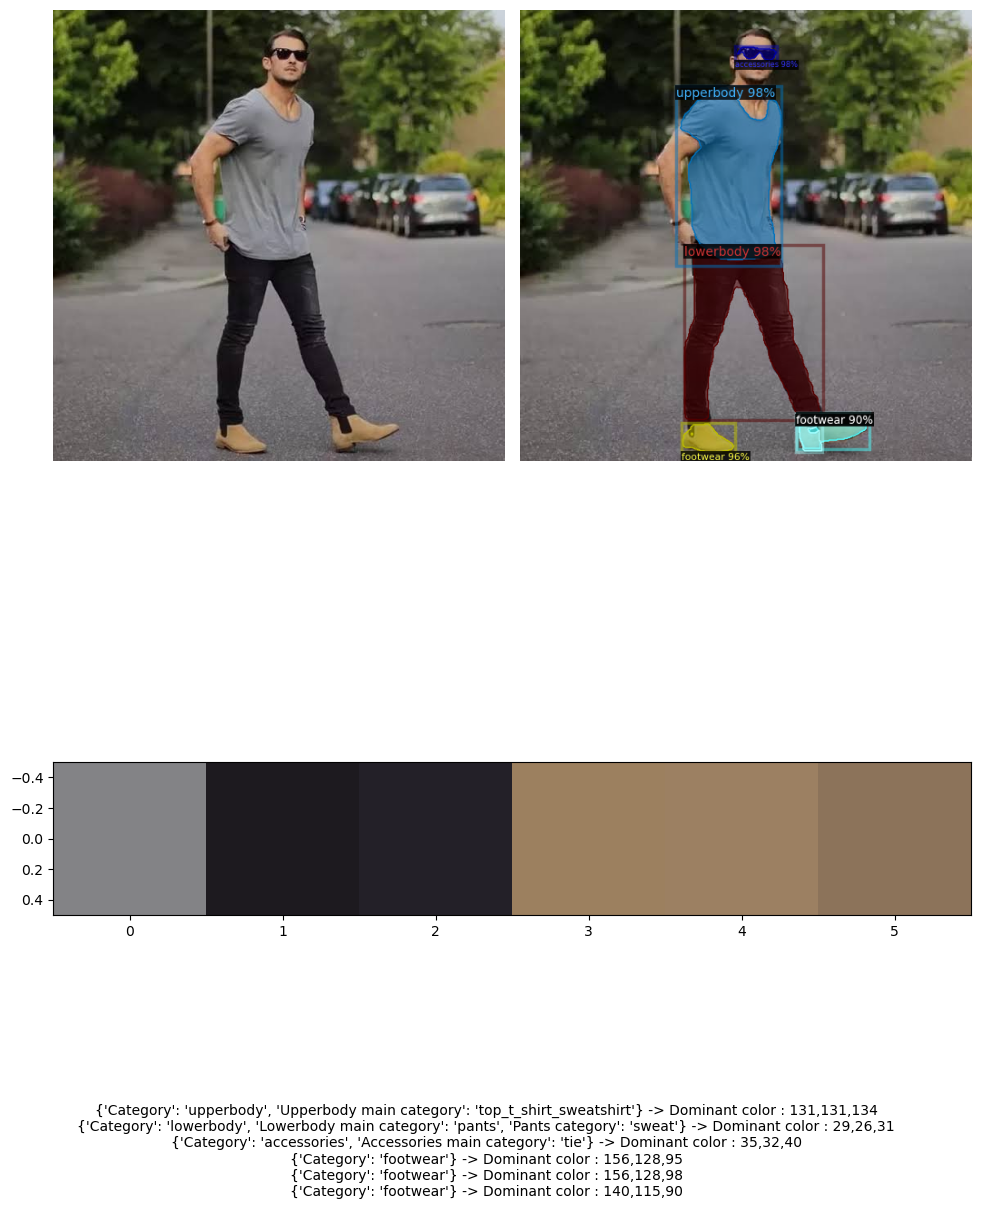

: 

In [19]:
image_path = "example.jpeg"
results = predict_image(image_path, predictor, cfg,save_dir=None, show=True)